In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

from tqdm.notebook import tqdm
from umap import UMAP

%matplotlib inline

C:\anaconda3\envs\torch\lib\site-packages\umap\distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
C:\anaconda3\envs\torch\lib\site-packages\umap\distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
C:\anaconda3\envs\torch\lib\site-packages\umap\distances.py:1086: NumbaDeprecationWarning: The 'nopython' keyword 

In [2]:
df1=pd.read_csv('datasets/outliers_info.csv')
df2=pd.read_csv('datasets/qber_with_outliers.csv')

In [3]:
df1

,level_0,index,class,steps_to_anomaly,dev,dev_normed_by_std,running_dev_w_5,running_dev_w_30,running_dev_w_100,running_mean_w_5,running_mean_w_30,running_mean_w_100,type
0,0,592,before_anomaly,10,0.000826,0.148767,-0.000500,0.000805,0.000910,0.009610,0.010915,0.011020,collective
1,1,593,before_anomaly,9,0.000604,0.108679,-0.001608,-0.000622,-0.000494,0.009932,0.010918,0.011045,collective
2,2,594,before_anomaly,8,0.000134,0.024064,-0.000754,-0.000183,-0.000005,0.010316,0.010887,0.011065,collective
3,3,595,before_anomaly,7,0.001124,0.202295,-0.001252,-0.001162,-0.001013,0.010808,0.010898,0.011047,collective
4,4,596,before_anomaly,6,0.000024,0.004260,0.000188,-0.000077,0.000054,0.011148,0.010883,0.011014,collective
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3239,3239,163001,anomaly,0,0.015054,2.710139,-0.000454,0.046599,0.003188,0.025536,0.072589,0.029178,collective
3240,3240,163002,anomaly,0,0.016934,3.048599,-0.002040,0.045202,0.001495,0.025830,0.073072,0.029365,collective
3241,3241,163003,anomaly,0,0.016564,2.981987,-0.001250,0.046068,0.002048,0.026250,0.073568,0.029548,collective
3242,3242,163004,anomaly,0,0.015134,2.724541,0.000416,0.047947,0.003650,0.026486,0.074017,0.029720,collective


In [4]:
df2

,index,e_mu_current,e_mu_estimated,e_nu_1,e_nu_2,q_mu,q_nu1,q_nu2,outliers
0,0,0.01298,0.01164,0.01904,0.17794,0.550377,0.164911,0.008094,0
1,1,0.01283,0.00961,0.01672,0.20868,0.564295,0.167629,0.006639,0
2,2,0.01268,0.00590,0.01337,0.20442,0.564179,0.164110,0.007052,0
3,3,0.01129,0.00988,0.01637,0.18453,0.573555,0.167174,0.006663,0
4,4,0.01169,0.01338,0.01783,0.11478,0.569296,0.169658,0.006823,0
...,...,...,...,...,...,...,...,...,...
184845,184845,0.00842,0.01104,0.02085,0.25589,0.566484,0.172819,0.008164,0
184846,184846,0.00971,0.00688,0.01592,0.23668,0.572031,0.170474,0.007907,0
184847,184847,0.00886,0.00743,0.01590,0.24216,0.569204,0.173147,0.007366,0
184848,184848,0.00868,0.00503,0.01384,0.24447,0.570114,0.168854,0.007378,0


(0.0, 1000.0)

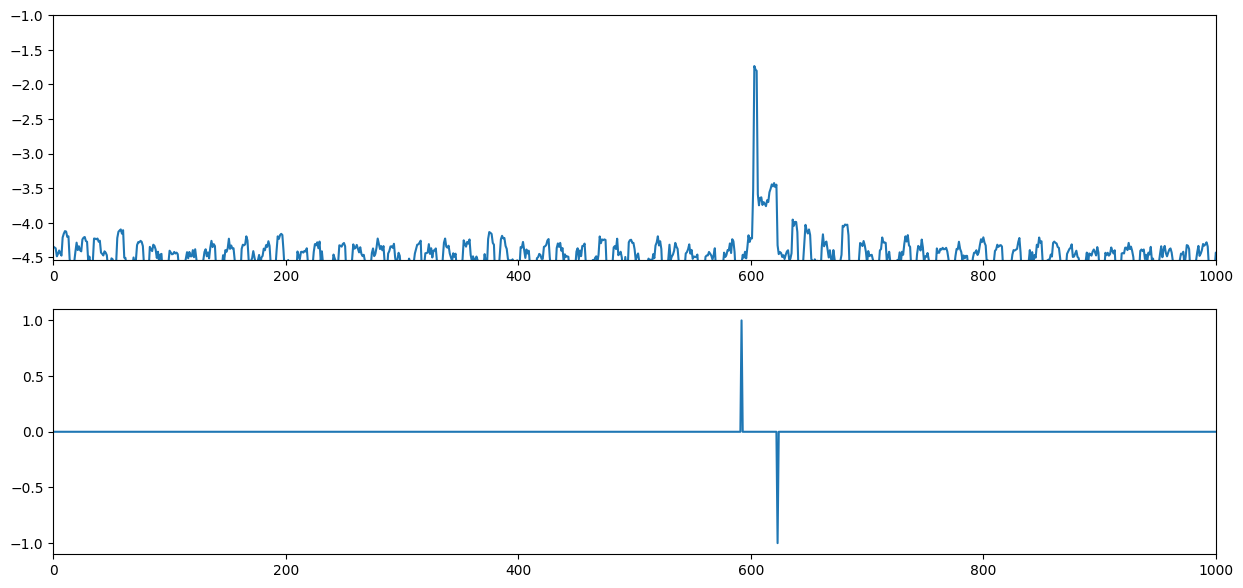

In [11]:
fig,axes=plt.subplots(2,1,figsize=(15,7))
data=np.log(df2['e_mu_current'])

N=1000
axes[0].plot(data)
axes[0].set_ylim(np.mean(data),-1)
axes[0].set_xlim(0,N)

axes[1].plot(df2['outliers'].diff())
axes[1].set_xlim(0,N)

In [19]:
points=df2['outliers'].diff().values[1:]

array([   591,   9586,  18585,  33158,  35878,  46356,  46386,  46926,
        47214,  60109,  60906,  83341,  91139, 108029, 130163, 133112,
       135198, 141339, 141482, 141589, 142104, 142159, 143542, 145310,
       145911, 151730, 153021, 153038, 153058, 162967, 162986],
      dtype=int64)

In [31]:
points=df2['outliers'].diff().values[1:]

np.where(points==1)[0].__len__()

31

In [27]:
3244/181605

0.017862944302194324

In [30]:
np.where(points==1)[0].__len__()

3244

# np.where(points==0)[0].__len__()